# Imports:

In [2]:
import gensim.downloader
from gensim.models.word2vec import LineSentence
from gensim.similarities import WordEmbeddingSimilarityIndex
from gensim.test.utils import datapath
from gensim.models import Word2Vec, KeyedVectors
from gensim.corpora.csvcorpus import CsvCorpus
import pandas as pd
import csv
import os
import gensim
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api
import matplotlib.pyplot as plt
import numpy as np
from csv import writer as writer

# Human Gold standard

In [3]:
synonyms = pd.read_csv("synonyms.csv")

# Task 1.1 & 1.2 - Process google-news-300 Pretrained Model, Calculate Statistics and Append to Respective Files

In [4]:
google_news = api.load('word2vec-google-news-300')

# Model processing

In [5]:
# Evaluates pre-trained model's ability to correctly guess the given corpus (in this case synonyms.csv) and returns a pandas dataframe
# containing the question word, the correct answer, the model's guess and whether the guess is correct or wrong

def model_evaluation(model, corpus):

    # Initializes columns for dataframe
    question_col, answer_col, guess_col, result_col = [], [], [], []

    # vecotrizes the similarity function so it can be applied across the numpy arrays comparing it with the four choices of words
    check_similarity = np.vectorize(model.similarity)

    # Iterates through each row of the corpus
    for index, question in corpus.iterrows():

        # extracts the question word, answer word, and choice words
        question_word, answer_word, choice_words = question[0], question[1], np.array(question)[2:]

        try:
            # checks if no choice words are present, if no choice words available - goes to except
            if not pd.isnull(choice_words.all()) == 0:
                raise KeyError
           
            # gets an array of the cosine similarities between the question word and the choice words
            # and selects word with the highest value
            similarities = check_similarity(question_word, choice_words)
            guess_word = choice_words[similarities.argmax()]
            
            # adds question word, answer word, and guess word to their respective column
            question_col.append(question_word)
            answer_col.append(answer_word)
            guess_col.append(guess_word)

            # adds correct/wrong to result column
            result_col.append('Correct') if guess_word == answer_word else result_col.append('Wrong')
            
        except KeyError:
            # adds question word and answer word to their respective column and adds 'N/A' to guess column as well as 'Guess' to result column
            # due to the fact that either the question word and/or all the choice words are not present in the model
            question_col.append(question_word)
            answer_col.append(answer_word)
            guess_col.append('N/A')
            result_col.append('Guess')
    
    return pd.DataFrame({'question word' : question_col, 'answer word': answer_col, 'guess word': guess_col, 'result': result_col})

# Statistics

In [11]:
# Gets statistics of correct and wrong guesses from evaluated model
def get_stats(model_data):
    # extracts the result column from the model_data and counts the amount of correct and wrong guesses
    results = pd.value_counts(model_data['result']) 
    correct_count = results['Correct'] if results.get('Correct') else 0  
    wrong_count = results['Wrong'] if results.get('Wrong') else 0
    guess_count = results['Guess'] if results.get('Guess') else 0
    v_statistic= correct_count+wrong_count+guess_count
    accuracy = correct_count / v_statistic if v_statistic != 0 else 0
    return correct_count, v_statistic, accuracy

In [18]:
google_news_results = model_evaluation(google_news, synonyms)

get_stats(google_news_results)

analysis_csv= open("analysis.csv","a")
my_writer = writer(analysis_csv)
googlenews_model_300_name = "google-news-300"
googlenews_model_300_name_doc = googlenews_model_300_name + "-details.csv"
googlenews_model_300_vocabulary_size = len(google_news)
googlenews_dataframe = model_evaluation(google_news, synonyms)
googlenews_csv = open(googlenews_model_300_name_doc,"a")
googlenews_dataframe.to_csv(path_or_buf=googlenews_csv, index=False)
googlenews_model_300_correct, googlenews_model_300_v_statistic, googlenews_model_300_accuracy = get_stats(googlenews_dataframe)
googlenews_model_300_list = [googlenews_model_300_name, googlenews_model_300_vocabulary_size, googlenews_model_300_correct, googlenews_model_300_v_statistic, googlenews_model_300_accuracy]
my_writer.writerow(googlenews_model_300_list)
analysis_csv.close()

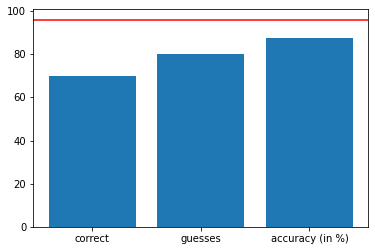

In [19]:

plt.bar(["correct", "guesses", "accuracy (in %)"],[googlenews_model_300_correct, googlenews_model_300_v_statistic, googlenews_model_300_accuracy*100])
plt.axhline(96, color='red')
plt.savefig("googlenews_statistics.pdf")

# Available models and datasets

In [ ]:
available_info = api.info()
# print(available_info)

# 2 models from different corpora, but same embedding size (Task 2.3.1)

In [8]:
wikinews_corpus_300 = api.load("fasttext-wiki-news-subwords-300")
conceptnet_corpus_300 = api.load("conceptnet-numberbatch-17-06-300")

# 2 models from same corpus, but different embedding sizes (Task 2.3.2)

In [9]:
glovetwitter_corpus_25 = api.load("glove-twitter-25")
glovetwitter_corpus_50 = api.load("glove-twitter-50")

# Calculating statistics and appending to analysis.csv or to [...]-details.csv

In [25]:
analysis_csv= open("analysis.csv","a")
my_writer = writer(analysis_csv)
wikinews_model_300_name = "fasttext-wiki-news-subwords-300"
wikinews_model_300_name_doc = wikinews_model_300_name + "-details.csv"
wikinews_model_300_vocabulary_size = len(wikinews_corpus_300)
wikinews_dataframe = model_evaluation(wikinews_corpus_300, synonyms)
wikinews_csv = open(wikinews_model_300_name_doc,"a")
wikinews_dataframe.to_csv("fasttext-wiki-news-subwords-300-details.csv", index=False)
wikinews_model_300_correct, wikinews_model_300_v_statistic, wikinews_model_300_accuracy = get_stats(wikinews_dataframe)
wikinews_model_300_list = [wikinews_model_300_name, wikinews_model_300_vocabulary_size, wikinews_model_300_correct, wikinews_model_300_v_statistic, wikinews_model_300_accuracy]
my_writer.writerow(wikinews_model_300_list)

conceptnet_model_300_name = "conceptnet-numberbatch-17-06-300"
conceptnet_model_300_name_doc = conceptnet_model_300_name + "-details.csv"
conceptnet_model_300_vocabulary_size = len(conceptnet_corpus_300)
conceptnet_dataframe = model_evaluation(conceptnet_corpus_300, synonyms)
concepnet_csv = open(conceptnet_model_300_name_doc, "a")
conceptnet_dataframe.to_csv("conceptnet-numberbatch-17-06-300-details.csv", index=False)
conceptnet_model_300_correct, conceptnet_model_300_v_statistic, conceptnet_model_300_accuracy = get_stats(conceptnet_dataframe)
conceptnet_model_300_list = [conceptnet_model_300_name, conceptnet_model_300_vocabulary_size, conceptnet_model_300_correct, conceptnet_model_300_v_statistic, conceptnet_model_300_accuracy]
my_writer.writerow(conceptnet_model_300_list)

glovetwitter_model_25_name = "glove-twitter-25"
glovetwitter_model_25_name_doc = glovetwitter_model_25_name + "-details.csv"
glovetwitter_model_25_vocabulary_size = len(glovetwitter_corpus_25)
glovetwitter_25_dataframe = model_evaluation(glovetwitter_corpus_25, synonyms)
glovetwitter_25_csv = open(glovetwitter_model_25_name_doc,"a")
glovetwitter_25_dataframe.to_csv("glove-twitter-25-details.csv", index=False)
glovetwitter_model_25_correct, glovetwitter_model_25_v_statistic, glovetwitter_model_25_accuracy = get_stats(glovetwitter_25_dataframe)
glovetwitter_model_25_list = [glovetwitter_model_25_name, glovetwitter_model_25_vocabulary_size, glovetwitter_model_25_correct, glovetwitter_model_25_v_statistic, glovetwitter_model_25_accuracy]
my_writer.writerow(glovetwitter_model_25_list)

glovetwitter_model_50_name = "glove-twitter-50"
glovetwitter_model_50_name_doc = glovetwitter_model_50_name + "-details.csv"
glovetwitter_model_50_vocabulary_size = len(glovetwitter_corpus_50)
glovetwitter_50_dataframe = model_evaluation(glovetwitter_corpus_50, synonyms)
glovetwitter_50_csv = open(glovetwitter_model_50_name_doc,"a")
glovetwitter_50_dataframe.to_csv("glove-twitter-50-details.csv", index=False)
glovetwitter_model_50_correct, glovetwitter_model_50_v_statistic, glovetwitter_model_50_accuracy = get_stats(glovetwitter_50_dataframe)
glovetwitter_model_50_list = [glovetwitter_model_50_name, glovetwitter_model_50_vocabulary_size, glovetwitter_model_50_correct, glovetwitter_model_50_v_statistic, glovetwitter_model_50_accuracy]
my_writer.writerow(glovetwitter_model_50_list)

39

# Drawing graphs for every statistic

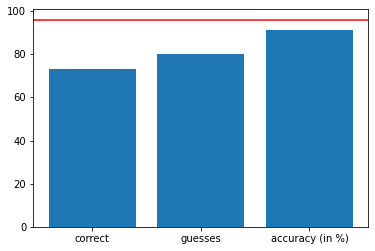

In [26]:
#Accuracy here is multiplied by 100 because it gives relatively small numbers e.g. 0.91, it makes hard to visualize

plt.bar(["correct", "guesses", "accuracy (in %)"],[wikinews_model_300_correct, wikinews_model_300_v_statistic, wikinews_model_300_accuracy*100])
plt.axhline(96, color='red')
plt.savefig("Wikinews_statistics.pdf")

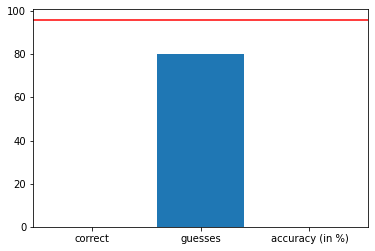

In [27]:
#Accuracy here is multiplied by 100 because it gives relatively small numbers e.g. 0.91, it makes hard to visualize

plt.bar(["correct", "guesses", "accuracy (in %)"],[conceptnet_model_300_correct, conceptnet_model_300_v_statistic, conceptnet_model_300_accuracy*100])
plt.axhline(96, color='red')
plt.savefig("Conceptnet_statistics.pdf")

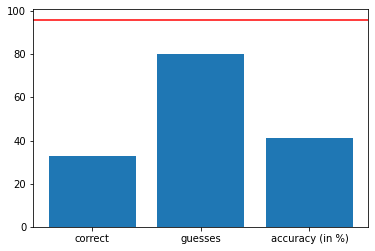

In [23]:
#Accuracy here is multiplied by 100 because it gives relatively small numbers e.g. 0.91, it makes hard to visualize

plt.bar(["correct", "guesses", "accuracy (in %)"],[glovetwitter_model_25_correct ,glovetwitter_model_25_v_statistic, glovetwitter_model_25_accuracy*100])
plt.axhline(96, color='red')
plt.savefig("Glovetwitter_25_statistics.pdf")

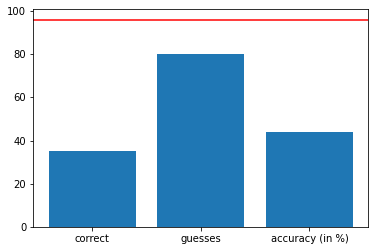

In [28]:
#Accuracy here is multiplied by 100 because it gives relatively small numbers e.g. 0.91, it makes hard to visualize

plt.bar(["correct", "guesses", "accuracy (in %)"],[glovetwitter_model_50_correct, glovetwitter_model_50_v_statistic, glovetwitter_model_50_accuracy*100])
plt.axhline(96, color='red')
plt.savefig("Glovetwitter_50_statistics.pdf")